In [8]:
import pandas
import matplotlib.pyplot as plt
import numpy as np

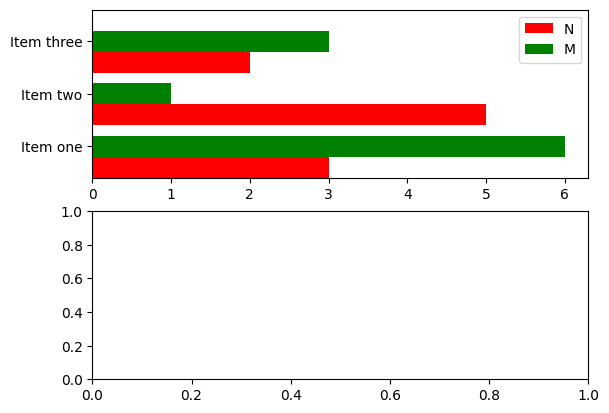

In [9]:
df = pandas.DataFrame(dict(graph=['Item one', 'Item two', 'Item three'],
                           n=[3, 5, 2], m=[6, 1, 3])) 

ind = np.arange(len(df))
width = 0.4

fig, ax = plt.subplots(2, 1)
ax[0].barh(ind, df.n, width, color='red', label='N')
ax[0].barh(ind + width, df.m, width, color='green', label='M')

ax[0].set(yticks=ind + width, yticklabels=df.graph, ylim=[2*width - 1, len(df)])
ax[0].legend()

plt.show()

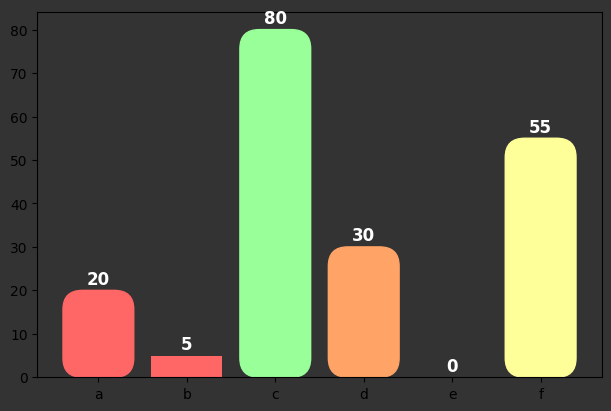

In [10]:
import numpy as np
from matplotlib.patches import FancyBboxPatch, Rectangle

columns_to_plot_labels = ['a', 'b', 'c', 'd', 'e', 'f']
player_values = [20, 5, 80, 30, None, 55]

# Handle null values _before_ plotting your data
values_replacing_nans = [x if x is not None else 0 for x in player_values ]
max_col_height = max(values_replacing_nans)
min_col_height = min(values_replacing_nans)

# create a dark grey figure
fig, ax = plt.subplots(figsize=(6,4), constrained_layout=True)
fig.set_facecolor('#333333')
ax.set_facecolor('#333333')

# set the colors for each range
colors = ['#FF6666', '#FFA366', '#FFFF99', '#99FF99'] 
color_thresholds = [1, 25, 50, 75]

# Set the rounding values
bar_width = 0.5
bar_separation = 0.1
bar_pad_factor = 0  # proportion of bar_width to add for rounding, 0 means no additional width
bar_rounding_factor = 0.2 # proportion of bar_width to add for rounding, 0 means no rounding, 0.5 means a circlular top

# Plot all bars together
bars = ax.bar(
    x=columns_to_plot_labels, 
    height=values_replacing_nans, 
    color=[colors[c] for c in np.digitize(values_replacing_nans, color_thresholds)-1],
    )

# loop through the bars
for i, bar in enumerate(bars):
    # add the text on top of the bars
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height()+0.5, values_replacing_nans[i],
        ha='center', va='bottom', color='white', weight='bold', fontsize=12)
    
    if bar.get_height() > bar_rounding_factor*max_col_height:
        # add the rounded bar on top of the original bar, note - this is rounded at both ends
        round_top = FancyBboxPatch(
            xy = bar.get_xy(),  # use the original bar's values to fill the new bar
            width=bar.get_width(), 
            height=bar.get_height(), 
            color=bar.get_facecolor(),
            boxstyle=f"round,pad={bar_pad_factor},rounding_size={bar_rounding_factor}",
            transform=ax.transData,
            mutation_scale=1.1,
            mutation_aspect=20,
            )
        # Over write the bottom half of the original bar with a Rectangle patch
        # square_bottom = Rectangle(
        #     xy = bar.get_xy(), 
        #     width=bar.get_width(), 
        #     height=bar.get_height()/2, 
        #     color=bar.get_facecolor(),
        #     transform=ax.transData,
        #     )
        # remove the original bar from the plot
        bar.remove()
        # add the new artists to the plot
        ax.add_patch(round_top)
        # ax.add_patch(square_bottom)
plt.show()

Text(0.8, 0.9, 'Penalty')

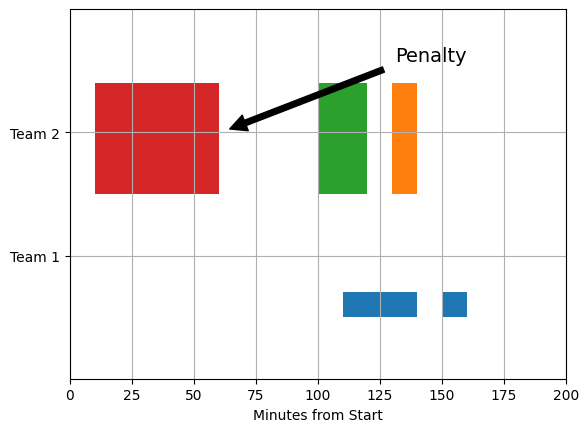

In [5]:
team_1 = [(110, 30), (150, 10)]
team_2 = [(10, 50), (100, 20), (130, 10)]
fig, ax = plt.subplots()
bar_1 = ax.broken_barh(team_1, (10,2), facecolors="tab:blue")
bar_2 = ax.broken_barh(team_2, (20,9), 
               facecolors=("tab:red","tab:green","tab:orange"))
ax.set_ylim(5,35)
ax.set_xlim(0,200)
ax.set_xlabel("Minutes from Start")
ax.set_yticks([15, 25])

ax.set_yticklabels(["Team 1", "Team 2"])
ax.grid(True)

ax.annotate("Penalty", (61, 25), textcoords="axes fraction", 
            xytext=(0.8, 0.9),
           arrowprops=dict(facecolor="black",shrink=0.05),
           fontsize=14, horizontalalignment="right",
           verticalalignment="top")


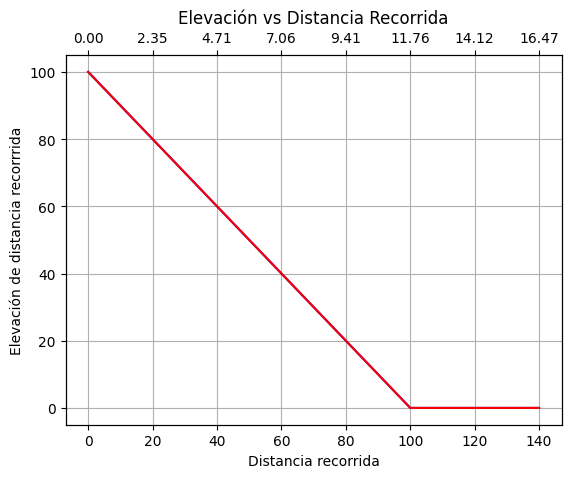

In [12]:

x = np.linspace(0, 140)  # Some x values, similar to your range
# Caps them to a minimum of 0
y = np.clip(x * (-1) + 100, a_min=0, a_max=100)  

# Creates something similar to your data
elevation_distance_np = np.hstack((x[:, np.newaxis], y[:, np.newaxis]))

# I guessed some transform. If you don't have a formula, 
# you'll need to interpolate between known values, probably.
suma_kWh_np = x / 8.5  
fig, ax1 = plt.subplots()

# Changed to explicit notation, so we don't go back and forth between them
ax1.plot(elevation_distance_np[:,0], elevation_distance_np[:,1], color = 'blue')
ax1.grid(True)
ax1.set_xlabel("Distancia recorrida")
ax1.set_ylabel("Elevación de distancia recorrrida")

ax2 = ax1.twiny()

# Added a copy of your line, but which will be removed later
extra_line = ax2.plot(suma_kWh_np, elevation_distance_np[:,1], color = 'r')

# Now, we get the x ticks and transform them to kWh.
# Here, I had to remove the first and last points ([1:-1])
# because ax1.get_xticks() returned a range from -20 to 160,
ax2.set_xticks(ax1.get_xticks()[1:-1] / 8.5)
ax1.set_title("Elevación vs Distancia Recorrida")

plt.show()

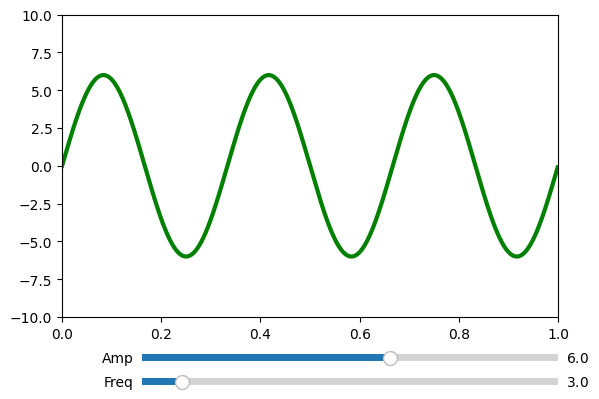